In [634]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
lm = pickle.load(open('model.pickle', 'rb'))

%matplotlib inline
sns.set()

In [635]:
df = pd.read_csv('kc_house_data_train.csv', sep=',', index_col=0)
pd.options.display.float_format = '{:.4f}'.format

In [636]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000,4,2.2500,2070,8893,2.0000,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.1620,2390,7700
1,7974200820,20140821T000000,865000,5,3.0000,2900,6730,1.0000,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.2850,2370,6283
2,7701450110,20140815T000000,1038000,4,2.5000,3770,10893,2.0000,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.1290,3710,9685
3,9522300010,20150331T000000,1490000,3,3.5000,4560,14608,2.0000,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.2280,4050,14226
4,9510861140,20140714T000000,711000,3,2.5000,2550,5376,2.0000,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.0830,2250,4050


In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  int64  
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [638]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000,17290.0000
mean,4565501756.4366,540739.5486,3.3725,2.1119,2081.4646,15243.3999,1.4903,0.0080,0.2385,3.4085,7.6544,1789.3060,292.1586,1970.7920,83.8063,98078.1932,47.5601,-122.2143,1987.9867,12873.4758
std,2874655595.3624,373318.9787,0.9393,0.7705,920.0185,42304.6238,0.5389,0.0890,0.7752,0.6513,1.1747,829.2651,443.1519,29.3435,400.3294,53.6079,0.1384,0.1409,684.8026,27227.4376
min,1000102.0000,75000.0000,0.0000,0.0000,290.0000,572.0000,1.0000,0.0000,0.0000,1.0000,1.0000,290.0000,0.0000,1900.0000,0.0000,98001.0000,47.1559,-122.5190,399.0000,659.0000
25%,2114700558.7500,321000.0000,3.0000,1.5000,1430.0000,5081.2500,1.0000,0.0000,0.0000,3.0000,7.0000,1200.0000,0.0000,1951.0000,0.0000,98033.0000,47.4712,-122.3290,1490.0000,5111.2500
50%,3903650042.5000,450000.0000,3.0000,2.2500,1920.0000,7642.0000,1.5000,0.0000,0.0000,3.0000,7.0000,1560.0000,0.0000,1974.0000,0.0000,98065.0000,47.5716,-122.2300,1840.0000,7622.5000
75%,7301150051.5000,645000.0000,4.0000,2.5000,2550.0000,10725.7500,2.0000,0.0000,0.0000,4.0000,8.0000,2214.5000,560.0000,1996.0000,0.0000,98118.0000,47.6779,-122.1260,2360.0000,10101.7500
max,9900000190.0000,7700000.0000,33.0000,8.0000,13540.0000,1651359.0000,3.5000,1.0000,4.0000,5.0000,13.0000,9410.0000,4820.0000,2015.0000,2015.0000,98199.0000,47.7776,-121.3150,6210.0000,858132.0000


In [639]:
#df = df.drop(columns=['id','zipcode','lat','long','date'], inplace=True)

In [640]:
yrs_old = (2020 - df['yr_built'])
df['yrs_old'] = yrs_old

In [641]:
#df = df.drop(columns=['yr_built'], inplace=True)

In [642]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old
0,2591820310,20141006T000000,365000,4,2.2500,2070,8893,2.0000,0,0,...,2070,0,1986,0,98058,47.4388,-122.1620,2390,7700,34
1,7974200820,20140821T000000,865000,5,3.0000,2900,6730,1.0000,0,0,...,1830,1070,1977,0,98115,47.6784,-122.2850,2370,6283,43
2,7701450110,20140815T000000,1038000,4,2.5000,3770,10893,2.0000,0,2,...,3770,0,1997,0,98006,47.5646,-122.1290,3710,9685,23
3,9522300010,20150331T000000,1490000,3,3.5000,4560,14608,2.0000,0,2,...,4560,0,1990,0,98034,47.6995,-122.2280,4050,14226,30
4,9510861140,20140714T000000,711000,3,2.5000,2550,5376,2.0000,0,0,...,2550,0,2004,0,98052,47.6647,-122.0830,2250,4050,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000,5,2.5000,3240,9960,1.0000,0,1,...,2020,1220,1958,0,98008,47.5858,-122.1120,2730,10400,62
17286,8819900270,20140520T000000,440000,2,1.7500,1300,4000,2.0000,0,0,...,1300,0,1948,0,98105,47.6687,-122.2880,1350,4013,72
17287,3816300095,20140514T000000,310000,3,1.0000,1050,9876,1.0000,0,0,...,1050,0,1953,0,98028,47.7635,-122.2620,1760,9403,67
17288,122069107,20141204T000000,427500,3,1.5000,1900,43186,1.5000,0,0,...,1300,600,1971,0,98038,47.4199,-121.9900,2080,108028,49


In [643]:
df['renovated'] = df['yr_renovated'].apply(lambda x:  1 if x > 0 else 0)

In [644]:
df['basement'] = df['sqft_basement'].apply(lambda x:  1 if x > 0 else 0)

In [645]:
df['view_condition'] = df['view']*df['condition']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,renovated,basement,view_condition
0,2591820310,20141006T000000,365000,4,2.2500,2070,8893,2.0000,0,0,...,0,98058,47.4388,-122.1620,2390,7700,34,0,0,0
1,7974200820,20140821T000000,865000,5,3.0000,2900,6730,1.0000,0,0,...,0,98115,47.6784,-122.2850,2370,6283,43,0,1,0
2,7701450110,20140815T000000,1038000,4,2.5000,3770,10893,2.0000,0,2,...,0,98006,47.5646,-122.1290,3710,9685,23,0,0,6
3,9522300010,20150331T000000,1490000,3,3.5000,4560,14608,2.0000,0,2,...,0,98034,47.6995,-122.2280,4050,14226,30,0,0,6
4,9510861140,20140714T000000,711000,3,2.5000,2550,5376,2.0000,0,0,...,0,98052,47.6647,-122.0830,2250,4050,16,0,0,0


In [646]:
log_sqft_lot = np.log(df['sqft_lot'])
df['log_sqft_lot'] = log_sqft_lot

In [647]:
df['sqft_above^2'] = df['sqft_above']**2

In [648]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,yrs_old,renovated,basement,view_condition,log_sqft_lot,sqft_above^2
0,2591820310,20141006T000000,365000,4,2.2500,2070,8893,2.0000,0,0,...,47.4388,-122.1620,2390,7700,34,0,0,0,9.0930,4284900
1,7974200820,20140821T000000,865000,5,3.0000,2900,6730,1.0000,0,0,...,47.6784,-122.2850,2370,6283,43,0,1,0,8.8143,3348900
2,7701450110,20140815T000000,1038000,4,2.5000,3770,10893,2.0000,0,2,...,47.5646,-122.1290,3710,9685,23,0,0,6,9.2959,14212900
3,9522300010,20150331T000000,1490000,3,3.5000,4560,14608,2.0000,0,2,...,47.6995,-122.2280,4050,14226,30,0,0,6,9.5893,20793600
4,9510861140,20140714T000000,711000,3,2.5000,2550,5376,2.0000,0,0,...,47.6647,-122.0830,2250,4050,16,0,0,0,8.5897,6502500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000,5,2.5000,3240,9960,1.0000,0,1,...,47.5858,-122.1120,2730,10400,62,0,1,3,9.2063,4080400
17286,8819900270,20140520T000000,440000,2,1.7500,1300,4000,2.0000,0,0,...,47.6687,-122.2880,1350,4013,72,0,0,0,8.2940,1690000
17287,3816300095,20140514T000000,310000,3,1.0000,1050,9876,1.0000,0,0,...,47.7635,-122.2620,1760,9403,67,0,0,0,9.1979,1102500
17288,122069107,20141204T000000,427500,3,1.5000,1900,43186,1.5000,0,0,...,47.4199,-121.9900,2080,108028,49,0,1,0,10.6733,1690000


In [649]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrs_old', 'renovated',
       'basement', 'view_condition', 'log_sqft_lot', 'sqft_above^2'],
      dtype='object')

In [650]:
x1 = sm.add_constant(features)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1989.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:57:26   Log-Likelihood:            -2.3634e+05
No. Observations:               17290   AIC:                         4.727e+05
Df Residuals:                   17270   BIC:                         4.729e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.566e+05   3.43e+04    -13.315      0.000   -5.24e+05   -3.89e+05
bedrooms       -1.767e+04   2215.001     -7.975      0.000    -2.2e+04   -1.33e+04
bathrooms       4.069e+04   3824.247     10.640      0.000    3.32e+04    4.82e+04
sqft_living       22.1135      4.076      5.425      0.000      14.123      30.104
sqft_lot           0.3002      0.058      5.151      0.000       0.186       0.414
floors          1.747e+04   4756.409      3.673      0.000    8145.853    2.68e+04
waterfront      6.048e+05   1.98e+04     30.614      0.000    5.66e+05    6.44e+05
view           -2.039e+04   1.07e+04     -1.900      0.057   -4.14e+04     640.052
condition       2.373e+04   2828.259      8.391      0.000    1.82e+04    2.93e+04
grade           1.204e+05   2469.376     48.764      0.000    1.16e+05    1.25e+05
sqft_above      -117.0203      6.277    -18.643      0.000    -129.323    -104.717
sqft_basement    139.1338      5.357     25.972      0.000     128.633     149.634
yr_renovated    3468.2951    500.661      6.927      0.000    2486.949    4449.641
sqft_living15     57.7562      4.006     14.418      0.000      49.904      65.608
sqft_lot15        -0.0548      0.089     -0.619      0.536      -0.228       0.119
yrs_old         3263.6410     77.568     42.075      0.000    3111.600    3415.682
renovated      -6.881e+06   9.99e+05     -6.886      0.000   -8.84e+06   -4.92e+06
basement       -2.337e+04   6116.325     -3.821      0.000   -3.54e+04   -1.14e+04
view_condition  1.813e+04   2980.284      6.084      0.000    1.23e+04     2.4e+04
log_sqft_lot   -4.609e+04   3207.000    -14.371      0.000   -5.24e+04   -3.98e+04
sqft_above^2       0.0496      0.001     36.344      0.000       0.047       0.052
==============================================================================
Omnibus:                     9004.780   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           324431.395
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      23.889   Cond. No.                     2.36e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [651]:
#features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       #'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       #'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       #'yrs_old', 'renovated', 'basement', 'view_condition', 'log_sqft_lot',
       #'sqft_above^2']]
#vif = pd.DataFrame()
#vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
#vif["Features"] = features.columns
#vif

In [652]:
#sns.pairplot(df)

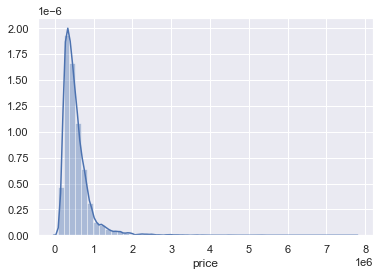

In [653]:
sns.distplot(df['price'])

In [654]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,yrs_old,renovated,basement,view_condition,log_sqft_lot,sqft_above^2
id,1.0000,-0.0156,-0.0015,0.0038,-0.0143,-0.1298,0.0171,0.0001,0.0126,-0.0143,...,-0.0019,0.0174,-0.0075,-0.1396,-0.0137,-0.0195,0.0034,0.0108,-0.1518,-0.0226
price,-0.0156,1.0000,0.3051,0.5243,0.7035,0.0868,0.2570,0.2758,0.3955,0.0361,...,0.3024,0.0193,0.5856,0.0814,-0.0565,0.1174,0.1770,0.3911,0.1617,0.6399
bedrooms,-0.0015,0.3051,1.0000,0.5079,0.5704,0.0294,0.1730,-0.0086,0.0797,0.0253,...,-0.0022,0.1243,0.3876,0.0267,-0.1538,0.0134,0.1614,0.0773,0.1791,0.4043
bathrooms,0.0038,0.5243,0.5079,1.0000,0.7553,0.0855,0.4980,0.0658,0.1888,-0.1230,...,0.0231,0.2213,0.5681,0.0865,-0.5078,0.0476,0.1625,0.1767,0.1016,0.6304
sqft_living,-0.0143,0.7035,0.5704,0.7553,1.0000,0.1668,0.3572,0.1097,0.2833,-0.0615,...,0.0526,0.2345,0.7551,0.1796,-0.3194,0.0512,0.2036,0.2710,0.3410,0.8465
sqft_lot,-0.1298,0.0868,0.0294,0.0855,0.1668,1.0000,-0.0022,0.0154,0.0731,-0.0137,...,-0.0820,0.2262,0.1370,0.7019,-0.0542,0.0046,-0.0387,0.0693,0.6353,0.1903
floors,0.0171,0.2570,0.1730,0.4980,0.3572,-0.0022,1.0000,0.0251,0.0259,-0.2592,...,0.0482,0.1288,0.2839,-0.0082,-0.4837,0.0059,-0.2603,0.0141,-0.2285,0.4488
waterfront,0.0001,0.2758,-0.0086,0.0658,0.1097,0.0154,0.0251,1.0000,0.4076,0.0096,...,-0.0133,-0.0427,0.0911,0.0269,0.0220,0.0946,0.0395,0.3934,0.0731,0.0849
view,0.0126,0.3955,0.0797,0.1888,0.2833,0.0731,0.0259,0.4076,1.0000,0.0451,...,0.0038,-0.0776,0.2800,0.0732,0.0496,0.0914,0.1875,0.9792,0.1225,0.1657
condition,-0.0143,0.0361,0.0253,-0.1230,-0.0615,-0.0137,-0.2592,0.0096,0.0451,1.0000,...,-0.0099,-0.1092,-0.0943,-0.0071,0.3589,-0.0605,0.1319,0.1071,0.0664,-0.1434


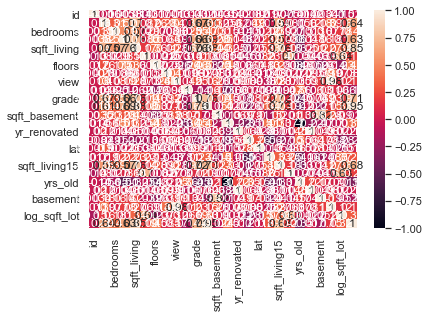

In [655]:
sns.heatmap(df.corr(),annot=True)

In [656]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrs_old', 'renovated',
       'basement', 'view_condition', 'log_sqft_lot', 'sqft_above^2'],
      dtype='object')

In [657]:
X = df.drop(columns=['id', 'date', 'price','yr_built','yr_renovated','zipcode','lat','long','view_condition','log_sqft_lot','sqft_above^2'])
                      

In [658]:
df.shape

(17290, 27)

In [659]:
y = df['price']

In [660]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [661]:
lm = LinearRegression()

In [662]:
lm.fit(X_train, y_train)

LinearRegression()

In [663]:
y_train_pred = lm.predict(X_train)

In [664]:
y_test_pred = lm.predict(X_test)

In [665]:
y_test_pred

array([ 401059.51654582,  247392.65731179, 1547379.27751311, ...,
        294117.35185832,  704401.90836958,  825779.22486921])

In [666]:
#test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
#test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 136257.8031881399
Mean Squared Error: 45146021997.24878
Root Mean Squared Error: 212475.93274827334


In [667]:
print(lm.intercept_)

-989221.4471762892


In [668]:
lm.coef_

array([-4.30921526e+04,  4.55341246e+04,  1.17585471e+02, -2.56716131e-02,
        2.05082023e+04,  6.00272879e+05,  4.57789586e+04,  1.63059072e+04,
        1.18149530e+05,  5.29322264e+01,  6.46532441e+01,  2.46821433e+01,
       -5.18045441e-01,  3.51184727e+03,  1.13440622e+04, -4.24852568e+03])

In [669]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coeff"'])
cdf

,"Coeff"""
bedrooms,-43092.1526
bathrooms,45534.1246
sqft_living,117.5855
sqft_lot,-0.0257
floors,20508.2023
waterfront,600272.8787
view,45778.9586
condition,16305.9072
grade,118149.5304
sqft_above,52.9322


Text(0, 0.5, 'Predictions')

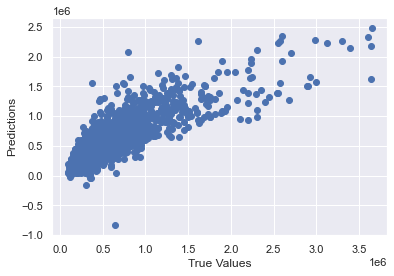

In [670]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

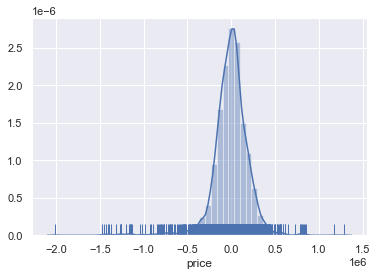

In [671]:
sns.distplot((y_test_pred-y_test), kde=True, rug =True);

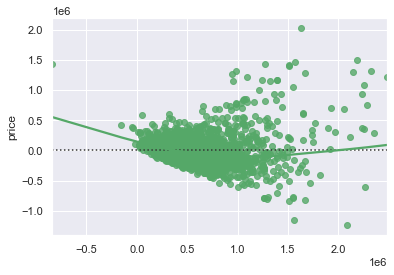

In [672]:
sns.residplot(y_test_pred, y_test, lowess=True, color="g")

In [673]:
sns.distplot((y_test_pred- df['price']), kde=True, rug=True);

ValueError: operands could not be broadcast together with shapes (3458,) (17290,) 

In [674]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 138359.06628513904
MSE: 43667372550.24295
RMSE: 208967.3959024301


In [675]:
import pickle

pickle_out = open("model.pickle","wb")
pickle.dump(lm, pickle_out)
pickle_out.close()